Average probability Pick a door and take it to the end - 0.03703061224489797
Average probability Change doors every round - 0.6685408163265307


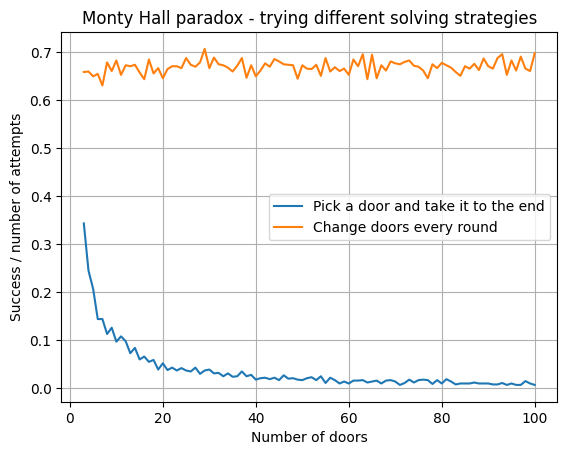

In [ ]:

def probabilidade_portas(num_portas, num_testes):
    #16/02/2023
    import random as r
    favorável_aleatório = 0
    favorável_ficando = 0
    favorável_intuição = 0
    favorável_mudando = 0
    str_doors = [f'goat{i}' for i in list(range(num_portas - 1))]
    str_doors.append('car')


    for i in range(num_testes):
        portas_faltando = list(range(num_portas))
        premiada = r.choice(portas_faltando)


        #ALEATÓRIO
        while len(portas_faltando) > 2:
    
            porta_escolhida = r.choice(portas_faltando)
            eliminada = r.choice([i for i in portas_faltando if i != premiada and i!= porta_escolhida])
            portas_faltando.remove(eliminada)

        if r.choice(portas_faltando) == premiada:
            favorável_aleatório+=1
        

        #FICANDO SEMPRE
        portas_faltando = list(range(num_portas))
        porta_escolhida = r.choice(portas_faltando)

        while len(portas_faltando) > 2:
            eliminada = r.choice([i for i in portas_faltando if i != premiada and i!= porta_escolhida])
            portas_faltando.remove(eliminada)
            
        if porta_escolhida == premiada:
            favorável_ficando +=1
        

        #INTUIÇÃO (50/50)
        portas_faltando = list(range(num_portas))
        x = 0
        y = 0
        porta_escolhida = r.choice(portas_faltando)

        while len(portas_faltando) > 2:
    
            porta_escolhida = porta_escolhida if r.randint(x, y) == 0 else r.choice([i for i in portas_faltando if i != porta_escolhida])
            eliminada = r.choice([i for i in portas_faltando if i != premiada and i!= porta_escolhida])
            portas_faltando.remove(eliminada)
            y = 1
        porta_escolhida = porta_escolhida if r.randint(x, y) == 0 else r.choice([i for i in portas_faltando if i != porta_escolhida])

        if porta_escolhida == premiada:
            favorável_intuição +=1
        

        #MUDANDO SEMPRE
        doors2 = list(i for i in str_doors)
        for i in range(num_portas):
            choose = r.choice(doors2)
            doors2.remove(r.choice([i for i in doors2 if i!= 'car' and i != choose]))


            if len(doors2) == 2:
                new_choice = r.choice([i for i in doors2 if i !=choose])
                if new_choice == 'car':
                    favorável_mudando+=1
                break

    prob_aleatório = favorável_aleatório / num_testes
    prob_ficando = favorável_ficando / num_testes
    prob_intuição = favorável_intuição / num_testes
    prob_mudando = favorável_mudando / num_testes


    
    return prob_ficando, prob_aleatório, prob_intuição, prob_mudando

def plot_stats(up_to, num_tests_for_each_point, step = 1):
    #16/02/2023
    import matplotlib.pyplot as plt, pandas as pd, numpy as np
    data_dict = {'Pick a door and take it to the end': [], 'Change doors every round': [], 'index' : [i+3 for i in range(0, up_to, step) if i+3<=up_to]}
    up_to += 1
    for i in range(0, up_to, step):
        if i>2:
            x = probabilidade_portas(i, num_tests_for_each_point)
            data_dict['Pick a door and take it to the end'].append(x[0])
            data_dict['Change doors every round'].append(x[3])
    x = pd.DataFrame(data_dict).set_index(['index'])
    x.plot()
    
    plt.xlabel('Number of doors')
    plt.ylabel('Success / number of attempts')
    plt.title('Monty Hall paradox - trying different solving strategies')
    plt.grid()

    for i in [i for i in data_dict if i != 'index']:
        print('Average probability', i, '-', np.mean(data_dict[i]))
    



plot_stats(20, 10000, step = 1)

